<a href="https://colab.research.google.com/github/mauricio201922/DataScience/blob/main/AulaSix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!apt-get -qq install stats_lib

E: Unable to locate package stats_lib


# 1. Escreva dois módulos Python, um para conter os cálculos que aprendemos na aula de estatística e outro para os cálculos da aula de álgebra linear

In [ ]:
from collections import Counter
from functools import reduce
import numpy as np
import math
import random
import matplotlib.pyplot as plt


In [ ]:
data = np.genfromtxt('/content/drive/MyDrive/Ciência da Computação/4° Ano/1° Semestre/1° bimestre/DataScience/Exercicio2/seeds_dataset.txt', delimiter='', usecols=(0,1,2,3,4,5,6))

In [ ]:
data

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

# 2. Imprima a moda e a mediana do comprimento e da largura de todas as instâncias.


In [ ]:
def medianLength(v):
  n = len(v)
  v_ordenado = sorted(v)
  i_centro = n // 2
  if n % 2 == 1:
    return v_ordenado(i_centro)
  else:
    i_centro2 = i_centro - 1
    return (v_ordenado[i_centro2] + v_ordenado[i_centro]) / 2

def medianWidth(v):
  n = len(v)
  v_ordenado = sorted(v)
  i_centro = n // 2
  if n % 2 == 1:
    return v_ordenado(i_centro)
  else:
    i_centro2 = i_centro - 1
    return (v_ordenado[i_centro2] + v_ordenado[i_centro]) / 2

def modaLength(v):
  counts = Counter(v)
  max_count = max(counts.values())
  return [v_i for v_i, count in counts.items()
    if count == max_count]

def modaWidth(v):
  counts = Counter(v)
  max_count = max(counts.values())
  return [v_i for v_i, count in counts.items()
    if count == max_count]


print(medianLength(data[:,3]))
print(medianWidth(data[:,4]))

print(modaLength(data[:,3]))
print(modaWidth(data[:,4]))

5.5235
3.237
[5.395, 5.236]
[3.026]


# 3. Imprima o desvio padrão dos comprimentos de todos os grãos e explique o resultado.


In [ ]:
def media(x):
  return sum(x)/len(x)

def de_mean(x):
  x_bar = media(x)
  return [x_i - x_bar for x_i in x]

def sum_of_squares(x):
  return sum([x_i * x_i for x_i in x])

def variance(x):
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)

def desvio_padrao(x):
  return math.sqrt(variance(x))

print(desvio_padrao(data[:,3]))

0.4430634777264492


### Explicando
##### Quaisquer que sejam as unidades, todas as nossas medidas de tendência central como a média, a mediana, etc. estão nessa mesma unidade. O intervalo também está nessa mesma unidade mas a variância tem unidades que são o quadrado das unidades originais, por ex.: "funcionários ao quadrado". Só q aqui, estamos fazendo o desvio padrão dos comprimentos do grão.

# 4. Imprima o desvio padrão das larguras de todos os grãos e explique o resultado.

In [ ]:
def media(x):
  return sum(x)/len(x)

def de_mean(x):
  x_bar = media(x)
  return [x_i - x_bar for x_i in x]

def sum_of_squares(x):
  return sum([x_i * x_i for x_i in x])

def variance(x):
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)

def desvio_padrao(x):
  return math.sqrt(variance(x))

print(desvio_padrao(data[:,4]))

0.37771444490658723


### Explicando
##### Quaisquer que sejam as unidades, todas as nossas medidas de tendência central como a média, a mediana, etc. estão nessa mesma unidade. O intervalo também está nessa mesma unidade mas a variância tem unidades que são o quadrado das unidades originais, por ex.: "funcionários ao quadrado". Só q aqui, estamos fazendo o desvio padrão das larguras do grão.

#5. Imprima as correlações entre o comprimento e a largura de cada espécie e explique cada resultado.

In [ ]:
# covariance
def dot(v, w):
  return sum(v_i * w_i
    for v_i, w_i in zip(v, w))

def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n - 1)

# Correlação
def correlation(x, y):
  stdev_x = desvio_padrao(x)
  stdev_y = desvio_padrao(y)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(x, y) / stdev_x / stdev_y
  else:
    return 0 # if no variation, correlation is zero

correlation(data[:,3], data[:,4])


0.8604149377143474

### Explicando
##### A correlação não possui unidade e está sempre entre -1 (anti-correlação perfeita) e 1 (correlação perfeita). Um número como 0,27 representa uma correlação positiva relativamente fraca. Aqui foi entre o comprimento e a largura do grão.


#6. Gere um gráfico de barras que mostre o comprimento médio e a largura média de cada espécie, com as médias gerais expressas em linhas horizontais, como no exemplo abaixo:

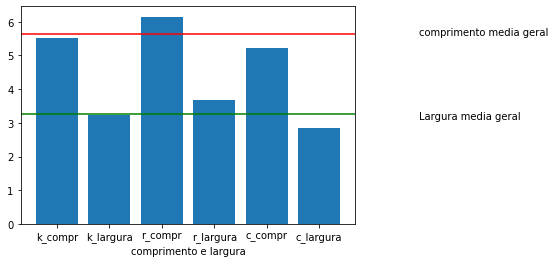

In [ ]:
barras = [media(data[0:70,3]), media(data[0:70,4]), 
          media(data[70:140,3]), media(data[70:140,4]),
          media(data[140:210,3]), media(data[140:210,4])]
  
x = ['k_compr', 'k_largura', 
     'r_compr', 'r_largura', 
     'c_compr', 'c_largura']

plt.bar(x, barras)

valorCompri = media(data[:,3])
valorLenght = media(data[:,4])

valorCompri1 = media(data[0:70,3])

plt.xlabel('comprimento e largura')
plt.axhline(valorCompri, color="red") #Gera a linha
plt.axhline(valorLenght, color="green") #Gera a linha
plt.text(6.9, 3.2, 'Largura media geral', va='center', ha="left") #texto
plt.text(6.9, 5.7, 'comprimento media geral', va='center', ha="left") #texto
plt.show()

# 7.Gere um gráfico de dispersão que mostre a relação entre a área e o perímetro de cada grão de trigo.

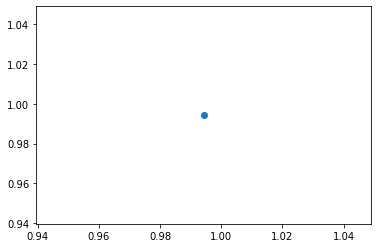

In [ ]:
x = correlation(data[:,0], data[:,1])
x2 = correlation(data[:,3], data[:,4])

plt.scatter(x, x)
plt.show()

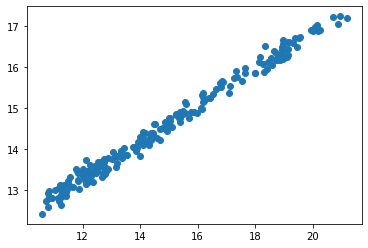

In [ ]:
plt.scatter(data[:,0], data[:,1])
plt.show()

#8. Usando o cálculo da distância entre dois vetores que aprendemos em aula, informe qual é a semente que mais se parece com a primeira semente da base de dados (índice 0). Sua resposta deverá ser composta pelo índice no vetor e pelo valor da distância, por exemplo: 97, 0.11234.

In [ ]:
def calcula_distancia(array1, array2):
    # Distância Euclidiana
    return np.linalg.norm(array1-array2)

def pega_vetor_mais_proximo(array_objetivo, array_all):

    menor_dist = calcula_distancia(array_objetivo, array_all[0])
    id_menor_dist = 0

    for i in range(1, array_all.shape[0]):
        dist = calcula_distancia(array_objetivo, array_all[i])
        if dist < menor_dist:
            menor_dist = dist
            id_menor_dist = i

    return id_menor_dist, menor_dist

pega_vetor_mais_proximo(data[0,2], data[1:,2])

(131, 0.00039999999999995595)